<h1>
    Web Detective
</h1>
<br>
<b>
    Aujourd’hui est votre premier jour :  vous commencez votre mission en tant que Data analyst chez  un libraire et concurrent en Amazon. Votre manager vous intègre dans une bonne ambiance et vous faites le tour de l’entreprise. Votre mission si vous l'acceptez est de faire le détective sur le web.
</b>

L’entreprise vient de refaire une refonte son site web. Votre manager vous briefe sur les missions qui vont se décliner en plusieurs étapes:

-Récupérer les infos sur les livres : titre, prix, rating, disponibilités des livres et option les liens vers les images de couverture des libres via un scrapper. Les informations des livres sur les 50 pages web issues du scrapper seront intégrées dans une base de données et dans un fichier csv. Une analyse est attendue.

La société souhaite analyser l’intérêt des livres ( les mieux notés ) dans le réseau social Twitter. Pour cela, votre manager vous demande de collecter tous les tweets via l’API de tweeter liés à ces livres depuis le 01/01/2021. La quantité de tweet liés à chaque livre sera entre 700 et 1000. Les livres à analyser seront : the Art of War, Private Paris, Batman : the Dark Night Return, Murder at the 42nd Street Library, The Book Thief. Il vous est demandé pour la collecte des tweets associés à chaque livre. Les tweet associés à chaque livre sont exportés en csv.

Voici les visualisations au minimum attendues: une analyse nuage de mots à représenter et la fréquence des bigrammes et trigrammes

    Bonus 1 : Automatiser la récupération des données sur les livres

    Bonus 2 : Code le scrapper du site https://books.toscrape.com/ en POO

    Bonus 3 : Faire une analyse de sentiments des livres sur Twitter

Ressource : https://books.toscrape.com/

In [1]:
import scrapy
from scrapy.linkextractors import LinkExtractor
from scrapy.spiders import CrawlSpider, Rule
from scrapy.crawler import CrawlerProcess
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tweepy
import os
import nltk
import re
import csv

<i>Importation des bibliothèques <b>Scrapy</b>, <b>Pandas</b>, <b>Seaborn</b> et <b>Tweepy</b>.</i>

    Scrapy : Scraping de site web
    Pandas : Gestionnaire de DataFrame
    Seaborn : Analyses visuelle de données
    Tweepy : Utilisation de l'API © Twitter

In [2]:
class Books_Item(scrapy.Item):
    Titre = scrapy.Field()
    Prix = scrapy.Field()
    Rating = scrapy.Field()
    Stock = scrapy.Field()
    
    
class Books_Scrap(CrawlSpider):
    name = "Books_Scrap"
    allowed_domains = ["books.toscrape.com"]
    rules = (Rule(LinkExtractor(allow=r"catalogue/"), callback="parse_books", follow=True),)

    def start_requests(self):
        url = "http://books.toscrape.com/"
        yield scrapy.Request(url)

    def parse_books(self, response):
        if response.xpath('//div[@class="col-sm-6 product_main"]').get() is not None:
            # récupération des titres
            titre = response.xpath('//div[@class="col-sm-6 product_main"]/h1/text()').get()
            # Récupération des tarifs
            prix = response.xpath('//div[@class="col-sm-6 product_main"]/p[@class="price_color"]/text()').get()
            # Récupération des stock
            stock = (
                response.xpath('//div[@class="col-sm-6 product_main"]/p[@class="instock availability"]/text()')
                .getall()[-1]
                .strip()
            )
            # Récupération du rating
            rating = response.xpath('//div[@class="col-sm-6 product_main"]/p[3]/@class').get()
            # Implémentation des variables dans l'objet
            item = Books_Item()
            item["Titre"] = titre
            item["Prix"] = prix
            item["Rating"] = rating
            item["Stock"] = stock
            yield item

<i>Création des 'class' de scraping des données relatives aux livres (prix, titre, rating et stock).</i>

In [3]:
process = CrawlerProcess({
    'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)',
    'FEED_FORMAT': 'csv',
    'FEED_URI': 'Livres.csv'
    })
process.crawl(Books_Scrap)
process.start()

2021-07-12 16:17:39 [scrapy.utils.log] INFO: Scrapy 2.5.0 started (bot: scrapybot)
2021-07-12 16:17:39 [scrapy.utils.log] INFO: Versions: lxml 4.6.1.0, libxml2 2.9.10, cssselect 1.1.0, parsel 1.6.0, w3lib 1.22.0, Twisted 21.2.0, Python 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)], pyOpenSSL 19.1.0 (OpenSSL 1.1.1h  22 Sep 2020), cryptography 3.1.1, Platform Windows-10-10.0.19041-SP0
2021-07-12 16:17:39 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.selectreactor.SelectReactor
2021-07-12 16:17:39 [scrapy.crawler] INFO: Overridden settings:
{'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)'}
2021-07-12 16:17:39 [scrapy.extensions.telnet] INFO: Telnet Password: df257dfa4fb37f8e
2021-07-12 16:17:39 [py.warnings] WARNING: C:\ProgramData\Anaconda3\lib\site-packages\scrapy\extensions\feedexport.py:247: ScrapyDeprecationWarning: The `FEED_URI` and `FEED_FORMAT` settings have been deprecated in favor of the `FEEDS` setting. Please see the `FEEDS`

2021-07-12 16:17:40 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/the-requiem-red_995/index.html>
{'Prix': '£22.65',
 'Rating': 'star-rating One',
 'Stock': 'In stock (19 available)',
 'Titre': 'The Requiem Red'}
2021-07-12 16:17:41 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/sapiens-a-brief-history-of-humankind_996/index.html>
{'Prix': '£54.23',
 'Rating': 'star-rating Five',
 'Stock': 'In stock (20 available)',
 'Titre': 'Sapiens: A Brief History of Humankind'}
2021-07-12 16:17:41 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/sharp-objects_997/index.html>
{'Prix': '£47.82',
 'Rating': 'star-rating Four',
 'Stock': 'In stock (20 available)',
 'Titre': 'Sharp Objects'}
2021-07-12 16:17:41 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/soumission_998/index.html>
{'Prix': '£50.10',
 'Rating': 'star-rating One',
 'Stock': 'In stock (20 availa

2021-07-12 16:17:41 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/category/books/food-and-drink_33/index.html> (referer: http://books.toscrape.com/)
2021-07-12 16:17:41 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/category/books/thriller_37/index.html> (referer: http://books.toscrape.com/)
2021-07-12 16:17:41 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/amid-the-chaos_788/index.html> (referer: http://books.toscrape.com/catalogue/category/books/cultural_49/index.html)
2021-07-12 16:17:41 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/category/books/history_32/index.html> (referer: http://books.toscrape.com/)
2021-07-12 16:17:41 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/category/books/business_35/index.html> (referer: http://books.toscrape.com/)
2021-07-12 16:17:41 [scrapy.core.scraper] DEBUG: Scraped

2021-07-12 16:17:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/redeeming-love_826/index.html> (referer: http://books.toscrape.com/catalogue/category/books/christian-fiction_34/index.html)
2021-07-12 16:17:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/benjamin-franklin-an-american-life_460/index.html> (referer: http://books.toscrape.com/catalogue/category/books/biography_36/index.html)
2021-07-12 16:17:42 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/unreasonable-hope-finding-faith-in-the-god-who-brings-purpose-to-your-pain_505/index.html>
{'Prix': '£46.33',
 'Rating': 'star-rating Two',
 'Stock': 'In stock (7 available)',
 'Titre': 'Unreasonable Hope: Finding Faith in the God Who Brings Purpose to '
          'Your Pain'}
2021-07-12 16:17:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/category/books/food-and-drink_33/page-2.html> (r

2021-07-12 16:17:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/tsubasa-world-chronicle-2-tsubasa-world-chronicle-2_949/index.html> (referer: http://books.toscrape.com/catalogue/page-3.html)
2021-07-12 16:17:42 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/this-one-summer_947/index.html>
{'Prix': '£19.49',
 'Rating': 'star-rating Four',
 'Stock': 'In stock (16 available)',
 'Titre': 'This One Summer'}
2021-07-12 16:17:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/untitled-collection-sabbath-poems-2014_953/index.html> (referer: http://books.toscrape.com/catalogue/page-3.html)
2021-07-12 16:17:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/we-love-you-charlie-freeman_954/index.html> (referer: http://books.toscrape.com/catalogue/page-3.html)
2021-07-12 16:17:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/cat

2021-07-12 16:17:43 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/the-power-greens-cookbook-140-delicious-superfood-recipes_410/index.html>
{'Prix': '£11.05',
 'Rating': 'star-rating Five',
 'Stock': 'In stock (5 available)',
 'Titre': 'The Power Greens Cookbook: 140 Delicious Superfood Recipes'}
2021-07-12 16:17:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/the-red-tent_273/index.html> (referer: http://books.toscrape.com/catalogue/this-one-summer_947/index.html)
2021-07-12 16:17:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/the-last-painting-of-sara-de-vos_259/index.html> (referer: http://books.toscrape.com/catalogue/this-one-summer_947/index.html)
2021-07-12 16:17:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/angels-walking-angels-walking-1_662/index.html> (referer: http://books.toscrape.com/catalogue/unicorn-tracks_951/index.htm

2021-07-12 16:17:43 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/kings-folly-the-kinsman-chronicles-1_473/index.html>
{'Prix': '£39.61',
 'Rating': 'star-rating Five',
 'Stock': 'In stock (7 available)',
 'Titre': "King's Folly (The Kinsman Chronicles #1)"}
2021-07-12 16:17:43 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/walk-the-edge-thunder-road-2_300/index.html>
{'Prix': '£32.36',
 'Rating': 'star-rating Three',
 'Stock': 'In stock (3 available)',
 'Titre': 'Walk the Edge (Thunder Road #2)'}
2021-07-12 16:17:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/the-testament-of-mary_765/index.html> (referer: http://books.toscrape.com/catalogue/my-mrs-brown_719/index.html)
2021-07-12 16:17:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/lilac-girls_597/index.html> (referer: http://books.toscrape.com/catalogue/voyager-outlander-3_299/index.h

2021-07-12 16:17:43 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/hollow-city-miss-peregrines-peculiar-children-2_813/index.html>
{'Prix': '£42.98',
 'Rating': 'star-rating One',
 'Stock': 'In stock (15 available)',
 'Titre': 'Hollow City (Miss Peregrine’s Peculiar Children #2)'}
2021-07-12 16:17:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/lola-and-the-boy-next-door-anna-and-the-french-kiss-2_385/index.html> (referer: http://books.toscrape.com/catalogue/walk-the-edge-thunder-road-2_300/index.html)
2021-07-12 16:17:43 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/the-star-touched-queen_764/index.html>
{'Prix': '£46.02',
 'Rating': 'star-rating Five',
 'Stock': 'In stock (14 available)',
 'Titre': 'The Star-Touched Queen'}
2021-07-12 16:17:43 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/the-glittering-court-the-glittering-court-1_845/in

2021-07-12 16:17:44 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/princess-between-worlds-wide-awake-princess-5_919/index.html> (referer: http://books.toscrape.com/catalogue/the-glittering-court-the-glittering-court-1_845/index.html)
2021-07-12 16:17:44 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/shobu-samurai-project-aryoku-3_830/index.html>
{'Prix': '£29.06',
 'Rating': 'star-rating Three',
 'Stock': 'In stock (15 available)',
 'Titre': 'Shobu Samurai, Project Aryoku (#3)'}
2021-07-12 16:17:44 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/modern-romance_820/index.html>
{'Prix': '£28.26',
 'Rating': 'star-rating Five',
 'Stock': 'In stock (15 available)',
 'Titre': 'Modern Romance'}
2021-07-12 16:17:44 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/the-white-queen-the-cousins-war-1_768/index.html>
{'Prix': '£25.91',
 'Rating': 'star-ratin

2021-07-12 16:17:44 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/throne-of-glass-throne-of-glass-1_868/index.html> (referer: http://books.toscrape.com/catalogue/hollow-city-miss-peregrines-peculiar-children-2_813/index.html)
2021-07-12 16:17:44 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/the-project_856/index.html> (referer: http://books.toscrape.com/catalogue/ready-player-one_209/index.html)
2021-07-12 16:17:44 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/harry-potter-and-the-prisoner-of-azkaban-harry-potter-3_328/index.html> (referer: http://books.toscrape.com/catalogue/better-homes-and-gardens-new-cook-book_423/index.html)
2021-07-12 16:17:44 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/soft-apocalypse_833/index.html> (referer: http://books.toscrape.com/catalogue/ready-player-one_209/index.html)
2021-07-12 16:17:44 [scrapy.core.scra

2021-07-12 16:17:45 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/south-of-sunshine_544/index.html>
{'Prix': '£28.93',
 'Rating': 'star-rating One',
 'Stock': 'In stock (8 available)',
 'Titre': 'South of Sunshine'}
2021-07-12 16:17:45 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/the-alien-club_569/index.html>
{'Prix': '£54.40',
 'Rating': 'star-rating One',
 'Stock': 'In stock (9 available)',
 'Titre': 'The Alien Club'}
2021-07-12 16:17:45 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/poisonous-max-revere-novels-3_627/index.html>
{'Prix': '£26.80',
 'Rating': 'star-rating Three',
 'Stock': 'In stock (12 available)',
 'Titre': 'Poisonous (Max Revere Novels #3)'}
2021-07-12 16:17:45 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/the-emerald-mystery_842/index.html> (referer: http://books.toscrape.com/catalogue/the-project_856/index.html)
2021

2021-07-12 16:17:45 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/ash_123/index.html>
{'Prix': '£22.06',
 'Rating': 'star-rating Four',
 'Stock': 'In stock (3 available)',
 'Titre': 'Ash'}
2021-07-12 16:17:45 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/thirteen-reasons-why_866/index.html> (referer: http://books.toscrape.com/catalogue/the-emerald-mystery_842/index.html)
2021-07-12 16:17:45 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/the-kite-runner_847/index.html> (referer: http://books.toscrape.com/catalogue/the-project_856/index.html)
2021-07-12 16:17:45 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/the-widow_609/index.html>
{'Prix': '£27.26',
 'Rating': 'star-rating Two',
 'Stock': 'In stock (11 available)',
 'Titre': 'The Widow'}
2021-07-12 16:17:45 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/th

2021-07-12 16:17:46 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/harry-potter-and-the-order-of-the-phoenix-harry-potter-5_327/index.html>
{'Prix': '£31.63',
 'Rating': 'star-rating Four',
 'Stock': 'In stock (4 available)',
 'Titre': 'Harry Potter and the Order of the Phoenix (Harry Potter #5)'}
2021-07-12 16:17:46 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/harry-potter-and-the-half-blood-prince-harry-potter-6_326/index.html>
{'Prix': '£48.75',
 'Rating': 'star-rating Five',
 'Stock': 'In stock (4 available)',
 'Titre': 'Harry Potter and the Half-Blood Prince (Harry Potter #6)'}
2021-07-12 16:17:46 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/soldier-talon-3_222/index.html>
{'Prix': '£24.72',
 'Rating': 'star-rating Two',
 'Stock': 'In stock (3 available)',
 'Titre': 'Soldier (Talon #3)'}
2021-07-12 16:17:46 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.tosc

2021-07-12 16:17:46 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/the-demonists-demonist-1_345/index.html> (referer: http://books.toscrape.com/catalogue/the-rose-the-dagger-the-wrath-and-the-dawn-2_278/index.html)
2021-07-12 16:17:46 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/the-false-prince-the-ascendance-trilogy-1_402/index.html> (referer: http://books.toscrape.com/catalogue/harry-potter-and-the-order-of-the-phoenix-harry-potter-5_327/index.html)
2021-07-12 16:17:46 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/tell-the-wind-and-fire_396/index.html> (referer: http://books.toscrape.com/catalogue/harry-potter-and-the-order-of-the-phoenix-harry-potter-5_327/index.html)
2021-07-12 16:17:46 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/a-feast-for-crows-a-song-of-ice-and-fire-4_357/index.html> (referer: http://books.toscrape.com/catalogue/

2021-07-12 16:17:46 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/the-thing-about-jellyfish_283/index.html> (referer: http://books.toscrape.com/catalogue/the-day-the-crayons-came-home-crayons_241/index.html)
2021-07-12 16:17:46 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/raymie-nightingale_482/index.html>
{'Prix': '£34.41',
 'Rating': 'star-rating Two',
 'Stock': 'In stock (7 available)',
 'Titre': 'Raymie Nightingale'}
2021-07-12 16:17:46 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/playing-from-the-heart_481/index.html>
{'Prix': '£32.38',
 'Rating': 'star-rating One',
 'Stock': 'In stock (7 available)',
 'Titre': 'Playing from the Heart'}
2021-07-12 16:17:46 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/three-wishes-river-of-time-california-1_89/index.html> (referer: http://books.toscrape.com/catalogue/having-the-barbarians-baby-ice-pl

2021-07-12 16:17:47 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/rain-fish_728/index.html> (referer: http://books.toscrape.com/catalogue/raymie-nightingale_482/index.html)
2021-07-12 16:17:47 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/once-was-a-time_724/index.html> (referer: http://books.toscrape.com/catalogue/raymie-nightingale_482/index.html)
2021-07-12 16:17:47 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/keep-me-posted_594/index.html>
{'Prix': '£20.46',
 'Rating': 'star-rating Four',
 'Stock': 'In stock (11 available)',
 'Titre': 'Keep Me Posted'}
2021-07-12 16:17:47 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/grey-fifty-shades-4_592/index.html>
{'Prix': '£48.49',
 'Rating': 'star-rating Four',
 'Stock': 'In stock (11 available)',
 'Titre': 'Grey (Fifty Shades #4)'}
2021-07-12 16:17:47 [scrapy.core.scraper] DEBUG: Scraped from <

2021-07-12 16:17:47 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/the-god-delusion_444/index.html>
{'Prix': '£46.85',
 'Rating': 'star-rating Three',
 'Stock': 'In stock (6 available)',
 'Titre': 'The God Delusion'}
2021-07-12 16:17:47 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/pride-and-prejudice_437/index.html>
{'Prix': '£19.27',
 'Rating': 'star-rating Four',
 'Stock': 'In stock (6 available)',
 'Titre': 'Pride and Prejudice'}
2021-07-12 16:17:47 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/mere-christianity_435/index.html>
{'Prix': '£48.51',
 'Rating': 'star-rating Three',
 'Stock': 'In stock (6 available)',
 'Titre': 'Mere Christianity'}
2021-07-12 16:17:47 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/shrunken-treasures-literary-classics-short-sweet-and-silly_484/index.html>
{'Prix': '£52.87',
 'Rating': 'star-rating Three',
 'Sto

2021-07-12 16:17:47 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/the-undomestic-goddess_286/index.html> (referer: http://books.toscrape.com/catalogue/something-blue-darcy-rachel-2_223/index.html)
2021-07-12 16:17:47 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/i-had-a-nice-time-and-other-lies-how-to-find-love-sht-like-that_814/index.html> (referer: http://books.toscrape.com/catalogue/shopaholic-ties-the-knot-shopaholic-3_340/index.html)
2021-07-12 16:17:47 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/the-glass-castle_496/index.html>
{'Prix': '£16.24',
 'Rating': 'star-rating One',
 'Stock': 'In stock (7 available)',
 'Titre': 'The Glass Castle'}
2021-07-12 16:17:47 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/the-drowning-girls_494/index.html>
{'Prix': '£35.67',
 'Rating': 'star-rating Three',
 'Stock': 'In stock (7 available)',
 'Titre

2021-07-12 16:17:48 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/take-me-with-you_741/index.html>
{'Prix': '£45.21',
 'Rating': 'star-rating Three',
 'Stock': 'In stock (14 available)',
 'Titre': 'Take Me with You'}
2021-07-12 16:17:48 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/the-songs-of-the-gods_763/index.html>
{'Prix': '£44.48',
 'Rating': 'star-rating Five',
 'Stock': 'In stock (14 available)',
 'Titre': 'The Songs of the Gods'}
2021-07-12 16:17:48 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/watchmen_579/index.html> (referer: http://books.toscrape.com/catalogue/a-heros-curse-the-unseen-chronicles-1_557/index.html)
2021-07-12 16:17:48 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/the-children_633/index.html>
{'Prix': '£11.88',
 'Rating': 'star-rating Three',
 'Stock': 'In stock (12 available)',
 'Titre': 'The Children'}
2021-07-1

2021-07-12 16:17:48 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/suddenly-in-love-lake-haven-1_835/index.html>
{'Prix': '£55.99',
 'Rating': 'star-rating Two',
 'Stock': 'In stock (15 available)',
 'Titre': 'Suddenly in Love (Lake Haven #1)'}
2021-07-12 16:17:48 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/the-midnight-watch-a-novel-of-the-titanic-and-the-californian_640/index.html>
{'Prix': '£26.20',
 'Rating': 'star-rating One',
 'Stock': 'In stock (12 available)',
 'Titre': 'The Midnight Watch: A Novel of the Titanic and the Californian'}
2021-07-12 16:17:48 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/amatus_787/index.html> (referer: http://books.toscrape.com/catalogue/the-songs-of-the-gods_763/index.html)
2021-07-12 16:17:48 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/something-more-than-this_834/index.html>
{'Prix': '£16.24',
 'R

2021-07-12 16:17:48 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/meditations_33/index.html>
{'Prix': '£25.89',
 'Rating': 'star-rating Two',
 'Stock': 'In stock (1 available)',
 'Titre': 'Meditations'}
2021-07-12 16:17:48 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/saga-volume-5-saga-collected-editions-5_923/index.html> (referer: http://books.toscrape.com/catalogue/page-4.html)
2021-07-12 16:17:48 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/her-backup-boyfriend-the-sorensen-family-1_896/index.html>
{'Prix': '£33.97',
 'Rating': 'star-rating One',
 'Stock': 'In stock (16 available)',
 'Titre': 'Her Backup Boyfriend (The Sorensen Family #1)'}
2021-07-12 16:17:48 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/beyond-good-and-evil_6/index.html>
{'Prix': '£43.38',
 'Rating': 'star-rating One',
 'Stock': 'In stock (1 available)',
 'Titre': 'B

2021-07-12 16:17:49 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/beauty-restored-riley-family-legacy-novellas-3_794/index.html> (referer: http://books.toscrape.com/catalogue/anonymous_790/index.html)
2021-07-12 16:17:49 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/ayumis-violin_791/index.html> (referer: http://books.toscrape.com/catalogue/anonymous_790/index.html)
2021-07-12 16:17:49 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/page-6.html> (referer: http://books.toscrape.com/catalogue/page-5.html)
2021-07-12 16:17:49 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/in-the-country-we-love-my-family-divided_901/index.html>
{'Prix': '£22.00',
 'Rating': 'star-rating Four',
 'Stock': 'In stock (16 available)',
 'Titre': 'In the Country We Love: My Family Divided'}
2021-07-12 16:17:49 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.

2021-07-12 16:17:49 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/dress-your-family-in-corduroy-and-denim_562/index.html> (referer: http://books.toscrape.com/catalogue/security_925/index.html)
2021-07-12 16:17:49 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/sense-and-sensibility_49/index.html>
{'Prix': '£37.46',
 'Rating': 'star-rating One',
 'Stock': 'In stock (1 available)',
 'Titre': 'Sense and Sensibility'}
2021-07-12 16:17:49 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/alice-in-wonderland-alices-adventures-in-wonderland-1_5/index.html> (referer: http://books.toscrape.com/catalogue/the-death-of-humanity-and-the-case-for-life_932/index.html)
2021-07-12 16:17:49 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/emma_17/index.html>
{'Prix': '£32.93',
 'Rating': 'star-rating Two',
 'Stock': 'In stock (1 available)',
 'Titre': 'Emma'}
2021-07

2021-07-12 16:17:50 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/eaternity-more-than-150-deliciously-easy-vegan-recipes-for-a-long-healthy-satisfied-joyful-life_689/index.html>
{'Prix': '£51.75',
 'Rating': 'star-rating Five',
 'Stock': 'In stock (14 available)',
 'Titre': 'Eaternity: More than 150 Deliciously Easy Vegan Recipes for a Long, '
          'Healthy, Satisfied, Joyful Life'}
2021-07-12 16:17:50 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/bitch-planet-vol-1-extraordinary-machine-bitch-planet-collected-editions_882/index.html>
{'Prix': '£37.92',
 'Rating': 'star-rating Two',
 'Stock': 'In stock (16 available)',
 'Titre': 'Bitch Planet, Vol. 1: Extraordinary Machine (Bitch Planet '
          '(Collected Editions))'}
2021-07-12 16:17:50 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/the-art-of-war_838/index.html>
{'Prix': '£33.34',
 'Rating': 'star-rating Five',
 'St

2021-07-12 16:17:50 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/hyperbole-and-a-half-unfortunate-situations-flawed-coping-mechanisms-mayhem-and-other-things-that-happened_702/index.html> (referer: http://books.toscrape.com/catalogue/dress-your-family-in-corduroy-and-denim_562/index.html)
2021-07-12 16:17:50 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/old-school-diary-of-a-wimpy-kid-10_723/index.html>
{'Prix': '£11.83',
 'Rating': 'star-rating Five',
 'Stock': 'In stock (14 available)',
 'Titre': 'Old School (Diary of a Wimpy Kid #10)'}
2021-07-12 16:17:50 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/orchestra-of-exiles-the-story-of-bronislaw-huberman-the-israel-philharmonic-and-the-one-thousand-jews-he-saved-from-nazi-horrors_337/index.html> (referer: http://books.toscrape.com/catalogue/forever-rockers-the-rocker-12_19/index.html)
2021-07-12 16:17:50 [scrapy.core.engine] 

2021-07-12 16:17:51 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/lust-wonder_191/index.html> (referer: http://books.toscrape.com/catalogue/fifty-shades-freed-fifty-shades-3_156/index.html)
2021-07-12 16:17:51 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/life-without-a-recipe_188/index.html> (referer: http://books.toscrape.com/catalogue/fifty-shades-freed-fifty-shades-3_156/index.html)
2021-07-12 16:17:51 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/me-talk-pretty-one-day_193/index.html> (referer: http://books.toscrape.com/catalogue/fifty-shades-freed-fifty-shades-3_156/index.html)
2021-07-12 16:17:51 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/a-heartbreaking-work-of-staggering-genius_115/index.html> (referer: http://books.toscrape.com/catalogue/fifty-shades-freed-fifty-shades-3_156/index.html)
2021-07-12 16:17:51 [scrapy.core.engine] 

2021-07-12 16:17:51 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/1st-to-die-womens-murder-club-1_2/index.html>
{'Prix': '£53.98',
 'Rating': 'star-rating One',
 'Stock': 'In stock (1 available)',
 'Titre': "1st to Die (Women's Murder Club #1)"}
2021-07-12 16:17:51 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/the-no-1-ladies-detective-agency-no-1-ladies-detective-agency-1_76/index.html>
{'Prix': '£57.70',
 'Rating': 'star-rating Four',
 'Stock': 'In stock (1 available)',
 'Titre': "The No. 1 Ladies' Detective Agency (No. 1 Ladies' Detective Agency "
          '#1)'}
2021-07-12 16:17:51 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/whats-it-like-in-space-stories-from-astronauts-whove-been-there_779/index.html>
{'Prix': '£19.60',
 'Rating': 'star-rating Two',
 'Stock': 'In stock (14 available)',
 'Titre': "What's It Like in Space?: Stories from Astronauts Who've Been There"}
20

2021-07-12 16:17:51 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/the-silkworm-cormoran-strike-2_280/index.html> (referer: http://books.toscrape.com/catalogue/career-of-evil-cormoran-strike-3_137/index.html)
2021-07-12 16:17:51 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/the-exiled_247/index.html> (referer: http://books.toscrape.com/catalogue/career-of-evil-cormoran-strike-3_137/index.html)
2021-07-12 16:17:51 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/the-metamorphosis_409/index.html>
{'Prix': '£28.58',
 'Rating': 'star-rating One',
 'Stock': 'In stock (5 available)',
 'Titre': 'The Metamorphosis'}
2021-07-12 16:17:51 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/the-cuckoos-calling-cormoran-strike-1_239/index.html> (referer: http://books.toscrape.com/catalogue/career-of-evil-cormoran-strike-3_137/index.html)
2021-07-12 16:17:51 [scra

2021-07-12 16:17:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/kill-em-and-leave-searching-for-james-brown-and-the-american-soul_528/index.html> (referer: http://books.toscrape.com/catalogue/chronicles-vol-1_462/index.html)
2021-07-12 16:17:52 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/the-golden-condom-and-other-essays-on-love-lost-and-found_637/index.html>
{'Prix': '£39.43',
 'Rating': 'star-rating One',
 'Stock': 'In stock (12 available)',
 'Titre': 'The Golden Condom: And Other Essays on Love Lost and Found'}
2021-07-12 16:17:52 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/matilda_32/index.html>
{'Prix': '£28.34',
 'Rating': 'star-rating One',
 'Stock': 'In stock (1 available)',
 'Titre': 'Matilda'}
2021-07-12 16:17:52 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/love-is-a-mix-tape-music-1_711/index.html>
{'Prix': '£18.03',
 'Ra

2021-07-12 16:17:52 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/the-new-drawing-on-the-right-side-of-the-brain_550/index.html>
{'Prix': '£43.02',
 'Rating': 'star-rating Three',
 'Stock': 'In stock (8 available)',
 'Titre': 'The New Drawing on the Right Side of the Brain'}
2021-07-12 16:17:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/sister-dear_485/index.html> (referer: http://books.toscrape.com/catalogue/green-eggs-and-ham-beginner-books-b-16_165/index.html)
2021-07-12 16:17:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/the-cat-in-the-hat-beginner-books-b-1_235/index.html> (referer: http://books.toscrape.com/catalogue/counting-thyme_142/index.html)
2021-07-12 16:17:52 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/please-kill-me-the-uncensored-oral-history-of-punk_537/index.html>
{'Prix': '£31.19',
 'Rating': 'star-rating Four',
 

2021-07-12 16:17:53 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/no-dream-is-too-high-life-lessons-from-a-man-who-walked-on-the-moon_722/index.html>
{'Prix': '£21.95',
 'Rating': 'star-rating Two',
 'Stock': 'In stock (14 available)',
 'Titre': 'No Dream Is Too High: Life Lessons From a Man Who Walked on the '
          'Moon'}
2021-07-12 16:17:53 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/old-records-never-die-one-mans-quest-for-his-vinyl-and-his-past_39/index.html>
{'Prix': '£55.66',
 'Rating': 'star-rating Two',
 'Stock': 'In stock (1 available)',
 'Titre': "Old Records Never Die: One Man's Quest for His Vinyl and His Past"}
2021-07-12 16:17:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/twenty-love-poems-and-a-song-of-despair_91/index.html> (referer: http://books.toscrape.com/catalogue/feathers-displays-of-brilliant-plumage_695/index.html)
2021-07-12 16:17:53 [scrapy

2021-07-12 16:17:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/codename-baboushka-volume-1-the-conclave-of-death_887/index.html> (referer: http://books.toscrape.com/catalogue/page-6.html)
2021-07-12 16:17:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/lies-and-other-acts-of-love_596/index.html> (referer: http://books.toscrape.com/catalogue/the-high-mountains-of-portugal_547/index.html)
2021-07-12 16:17:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/mothering-sunday_600/index.html> (referer: http://books.toscrape.com/catalogue/the-high-mountains-of-portugal_547/index.html)
2021-07-12 16:17:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/out-of-print-city-lights-spotlight-no-14_536/index.html> (referer: http://books.toscrape.com/catalogue/the-crossover_398/index.html)
2021-07-12 16:17:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET 

2021-07-12 16:17:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/i-hate-fairyland-vol-1-madly-ever-after-i-hate-fairyland-compilations-1-5_899/index.html> (referer: http://books.toscrape.com/catalogue/page-6.html)
2021-07-12 16:17:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/immunity-how-elie-metchnikoff-changed-the-course-of-modern-medicine_900/index.html> (referer: http://books.toscrape.com/catalogue/page-6.html)
2021-07-12 16:17:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/page-10.html> (referer: http://books.toscrape.com/catalogue/page-9.html)
2021-07-12 16:17:54 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/eight-hundred-grapes_690/index.html>
{'Prix': '£14.39',
 'Rating': 'star-rating Four',
 'Stock': 'In stock (14 available)',
 'Titre': 'Eight Hundred Grapes'}
2021-07-12 16:17:54 [scrapy.core.scraper] DEBUG: Scraped from <20

2021-07-12 16:17:54 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/outcast-vol-1-a-darkness-surrounds-him-outcast-1_915/index.html>
{'Prix': '£15.44',
 'Rating': 'star-rating Four',
 'Stock': 'In stock (16 available)',
 'Titre': 'Outcast, Vol. 1: A Darkness Surrounds Him (Outcast #1)'}
2021-07-12 16:17:54 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/pop-gun-war-volume-1-gift_918/index.html>
{'Prix': '£18.97',
 'Rating': 'star-rating One',
 'Stock': 'In stock (16 available)',
 'Titre': 'Pop Gun War, Volume 1: Gift'}
2021-07-12 16:17:54 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/patience_916/index.html>
{'Prix': '£10.16',
 'Rating': 'star-rating Three',
 'Stock': 'In stock (16 available)',
 'Titre': 'Patience'}
2021-07-12 16:17:54 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/lumberjanes-vol-2-friendship-to-the-max-lumberjanes-5-8_907/inde

2021-07-12 16:17:54 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/frostbite-vampire-academy-2_810/index.html>
{'Prix': '£29.99',
 'Rating': 'star-rating Five',
 'Stock': 'In stock (15 available)',
 'Titre': 'Frostbite (Vampire Academy #2)'}
2021-07-12 16:17:54 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/fables-vol-1-legends-in-exile-fables-1_806/index.html>
{'Prix': '£41.62',
 'Rating': 'star-rating Four',
 'Stock': 'In stock (15 available)',
 'Titre': 'Fables, Vol. 1: Legends in Exile (Fables #1)'}
2021-07-12 16:17:54 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/library-of-souls-miss-peregrines-peculiar-children-3_816/index.html> (referer: http://books.toscrape.com/catalogue/page-10.html)
2021-07-12 16:17:54 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/page-11.html> (referer: http://books.toscrape.com/catalogue/page-10.html)
2021-07-12

2021-07-12 16:17:55 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/the-inefficiency-assassin-time-management-tactics-for-working-smarter-not-longer_935/index.html>
{'Prix': '£20.59',
 'Rating': 'star-rating Five',
 'Stock': 'In stock (16 available)',
 'Titre': 'The Inefficiency Assassin: Time Management Tactics for Working '
          'Smarter, Not Longer'}
2021-07-12 16:17:55 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/the-gutsy-girl-escapades-for-your-life-of-epic-adventure_934/index.html>
{'Prix': '£37.13',
 'Rating': 'star-rating One',
 'Stock': 'In stock (16 available)',
 'Titre': 'The Gutsy Girl: Escapades for Your Life of Epic Adventure'}
2021-07-12 16:17:55 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/this-one-moment-pushing-limits-1_88/index.html> (referer: http://books.toscrape.com/catalogue/listen-to-me-fusion-1_29/index.html)
2021-07-12 16:17:55 [scrapy.core.engi

2021-07-12 16:17:55 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/the-book-of-basketball-the-nba-according-to-the-sports-guy_232/index.html> (referer: http://books.toscrape.com/catalogue/the-torch-is-passed-a-harding-family-story_945/index.html)
2021-07-12 16:17:55 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/mr-mercedes-bill-hodges-trilogy-1_717/index.html> (referer: http://books.toscrape.com/catalogue/the-secret-of-dreadwillow-carse_944/index.html)
2021-07-12 16:17:55 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/i-am-pilgrim-pilgrim-1_703/index.html> (referer: http://books.toscrape.com/catalogue/the-secret-of-dreadwillow-carse_944/index.html)
2021-07-12 16:17:55 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/friday-night-lights-a-town-a-team-and-a-dream_158/index.html>
{'Prix': '£51.22',
 'Rating': 'star-rating Three',
 'Stock': 'In stoc

2021-07-12 16:17:55 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/the-matchmakers-playbook-wingmen-inc-1_850/index.html>
{'Prix': '£55.85',
 'Rating': 'star-rating One',
 'Stock': 'In stock (15 available)',
 'Titre': "The Matchmaker's Playbook (Wingmen Inc. #1)"}
2021-07-12 16:17:55 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/the-hook-up-game-on-1_68/index.html>
{'Prix': '£36.29',
 'Rating': 'star-rating Five',
 'Stock': 'In stock (1 available)',
 'Titre': 'The Hook Up (Game On #1)'}
2021-07-12 16:17:55 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/the-rosie-project-don-tillman-1_761/index.html> (referer: http://books.toscrape.com/catalogue/page-12.html)
2021-07-12 16:17:55 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/shameless_52/index.html>
{'Prix': '£58.35',
 'Rating': 'star-rating Three',
 'Stock': 'In stock (1 available)',
 'Titre':

2021-07-12 16:17:56 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/naruto-3-in-1-edition-vol-14-includes-vols-40-41-42-naruto-omnibus-14_721/index.html>
{'Prix': '£38.39',
 'Rating': 'star-rating Two',
 'Stock': 'In stock (14 available)',
 'Titre': 'Naruto (3-in-1 Edition), Vol. 14: Includes Vols. 40, 41 & 42 '
          '(Naruto: Omnibus #14)'}
2021-07-12 16:17:56 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/how-to-be-a-domestic-goddess-baking-and-the-art-of-comfort-cooking_470/index.html>
{'Prix': '£28.25',
 'Rating': 'star-rating Two',
 'Stock': 'In stock (7 available)',
 'Titre': 'How to Be a Domestic Goddess: Baking and the Art of Comfort Cooking'}
2021-07-12 16:17:56 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/the-most-perfect-thing-inside-and-outside-a-birds-egg_938/index.html> (referer: http://books.toscrape.com/catalogue/page-4.html)
2021-07-12 16:17:56 [scrapy.core

2021-07-12 16:17:56 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/i-will-find-you_524/index.html>
{'Prix': '£44.21',
 'Rating': 'star-rating One',
 'Stock': 'In stock (8 available)',
 'Titre': 'I Will Find You'}
2021-07-12 16:17:56 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/the-power-of-habit-why-we-do-what-we-do-in-life-and-business_760/index.html>
{'Prix': '£16.88',
 'Rating': 'star-rating Three',
 'Stock': 'In stock (14 available)',
 'Titre': 'The Power of Habit: Why We Do What We Do in Life and Business'}
2021-07-12 16:17:56 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/so-cute-it-hurts-vol-6-so-cute-it-hurts-6_734/index.html> (referer: http://books.toscrape.com/catalogue/lowriders-to-the-center-of-the-earth-lowriders-in-space-2_712/index.html)
2021-07-12 16:17:56 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/private-paris-private-10

2021-07-12 16:17:57 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/the-midnight-assassin-panic-scandal-and-the-hunt-for-americas-first-serial-killer_549/index.html> (referer: http://books.toscrape.com/catalogue/rising-strong_539/index.html)
2021-07-12 16:17:57 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/chernobyl-012340-the-incredible-true-story-of-the-worlds-worst-nuclear-disaster_560/index.html>
{'Prix': '£35.92',
 'Rating': 'star-rating Two',
 'Stock': 'In stock (9 available)',
 'Titre': "Chernobyl 01:23:40: The Incredible True Story of the World's Worst "
          'Nuclear Disaster'}
2021-07-12 16:17:57 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/the-disappearing-spoon-and-other-true-tales-of-madness-love-and-the-history-of-the-world-from-the-periodic-table-of-the-elements_244/index.html> (referer: http://books.toscrape.com/catalogue/you-cant-bury-them-all-poems_961/in

2021-07-12 16:17:57 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/mother-can-you-not_599/index.html>
{'Prix': '£16.89',
 'Rating': 'star-rating Five',
 'Stock': 'In stock (11 available)',
 'Titre': 'Mother, Can You Not?'}
2021-07-12 16:17:57 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/tipping-point-for-planet-earth-how-close-are-we-to-the-edge_643/index.html>
{'Prix': '£37.55',
 'Rating': 'star-rating One',
 'Stock': 'In stock (12 available)',
 'Titre': 'Tipping Point for Planet Earth: How Close Are We to the Edge?'}
2021-07-12 16:17:57 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/the-fabric-of-the-cosmos-space-time-and-the-texture-of-reality_572/index.html>
{'Prix': '£55.91',
 'Rating': 'star-rating One',
 'Stock': 'In stock (9 available)',
 'Titre': 'The Fabric of the Cosmos: Space, Time, and the Texture of Reality'}
2021-07-12 16:17:57 [scrapy.core.engine] DEBUG: Crawled

2021-07-12 16:17:57 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/the-art-of-startup-fundraising_606/index.html> (referer: http://books.toscrape.com/catalogue/category/books/business_35/index.html)
2021-07-12 16:17:57 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/quench-your-own-thirst-business-lessons-learned-over-a-beer-or-two_629/index.html> (referer: http://books.toscrape.com/catalogue/category/books/business_35/index.html)
2021-07-12 16:17:57 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/the-e-myth-revisited-why-most-small-businesses-dont-work-and-what-to-do-about-it_545/index.html>
{'Prix': '£36.91',
 'Rating': 'star-rating One',
 'Stock': 'In stock (8 available)',
 'Titre': "The E-Myth Revisited: Why Most Small Businesses Don't Work and What "
          'to Do About It'}
2021-07-12 16:17:57 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalog

2021-07-12 16:17:58 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/living-leadership-by-insight-a-good-leader-achieves-a-great-leader-builds-monuments_709/index.html>
{'Prix': '£46.91',
 'Rating': 'star-rating Four',
 'Stock': 'In stock (14 available)',
 'Titre': 'Living Leadership by Insight: A Good Leader Achieves, a Great '
          'Leader Builds Monuments'}
2021-07-12 16:17:58 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/the-10-entrepreneur-live-your-startup-dream-without-quitting-your-day-job_836/index.html> (referer: http://books.toscrape.com/catalogue/category/books/business_35/index.html)
2021-07-12 16:17:58 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/the-hiding-place_406/index.html> (referer: http://books.toscrape.com/catalogue/category/books/history_32/index.html)
2021-07-12 16:17:58 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalog

2021-07-12 16:17:58 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/doctor-sleep-the-shining-2_686/index.html> (referer: http://books.toscrape.com/catalogue/page-16.html)
2021-07-12 16:17:58 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/a-short-history-of-nearly-everything_457/index.html> (referer: http://books.toscrape.com/catalogue/category/books/history_32/index.html)
2021-07-12 16:17:58 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/page-17.html> (referer: http://books.toscrape.com/catalogue/page-16.html)
2021-07-12 16:17:58 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/the-infinities_257/index.html>
{'Prix': '£27.41',
 'Rating': 'star-rating One',
 'Stock': 'In stock (3 available)',
 'Titre': 'The Infinities'}
2021-07-12 16:17:58 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/the-husbands-secret_256/ind

2021-07-12 16:17:59 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/atlas-shrugged_314/index.html>
{'Prix': '£26.58',
 'Rating': 'star-rating Five',
 'Stock': 'In stock (4 available)',
 'Titre': 'Atlas Shrugged'}
2021-07-12 16:17:59 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/far-from-true-promise-falls-trilogy-2_320/index.html> (referer: http://books.toscrape.com/catalogue/category/books/thriller_37/index.html)
2021-07-12 16:17:59 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/political-suicide-missteps-peccadilloes-bad-calls-backroom-hijinx-sordid-pasts-rotten-breaks-and-just-plain-dumb-mistakes-in-the-annals-of-american-politics_917/index.html>
{'Prix': '£36.28',
 'Rating': 'star-rating Two',
 'Stock': 'In stock (16 available)',
 'Titre': 'Political Suicide: Missteps, Peccadilloes, Bad Calls, Backroom '
          'Hijinx, Sordid Pasts, Rotten Breaks, and Just Plain Dumb Mist

2021-07-12 16:17:59 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/carrie_671/index.html>
{'Prix': '£46.23',
 'Rating': 'star-rating Two',
 'Stock': 'In stock (14 available)',
 'Titre': 'Carrie'}
2021-07-12 16:17:59 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/salems-lot_309/index.html> (referer: http://books.toscrape.com/catalogue/political-suicide-missteps-peccadilloes-bad-calls-backroom-hijinx-sordid-pasts-rotten-breaks-and-just-plain-dumb-mistakes-in-the-annals-of-american-politics_917/index.html)
2021-07-12 16:17:59 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/deception-point_426/index.html> (referer: http://books.toscrape.com/catalogue/digital-fortress_369/index.html)
2021-07-12 16:17:59 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/siddhartha_393/index.html>
{'Prix': '£34.22',
 'Rating': 'star-rating Five',
 'Stock': 'In stock (5 av

2021-07-12 16:17:59 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/the-three-searches-meaning-and-the-story_649/index.html> (referer: http://books.toscrape.com/catalogue/page-18.html)
2021-07-12 16:17:59 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/saga-volume-2-saga-collected-editions-2_107/index.html> (referer: http://books.toscrape.com/catalogue/siddhartha_393/index.html)
2021-07-12 16:17:59 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/fruits-basket-vol-2-fruits-basket-2_100/index.html> (referer: http://books.toscrape.com/catalogue/siddhartha_393/index.html)
2021-07-12 16:17:59 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/barefoot-contessa-back-to-basics_667/index.html> (referer: http://books.toscrape.com/catalogue/category/books/food-and-drink_33/index.html)
2021-07-12 16:17:59 [scrapy.core.scraper] DEBUG: Scraped from <200 http://boo

2021-07-12 16:18:00 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/the-love-and-lemons-cookbook-an-apple-to-zucchini-celebration-of-impromptu-cooking_849/index.html> (referer: http://books.toscrape.com/catalogue/category/books/food-and-drink_33/index.html)
2021-07-12 16:18:00 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/psycho-sanitarium-psycho-15_628/index.html> (referer: http://books.toscrape.com/catalogue/misery_332/index.html)
2021-07-12 16:18:00 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/the-help-yourself-cookbook-for-kids-60-easy-plant-based-recipes-kids-can-make-to-stay-healthy-and-save-the-earth_751/index.html>
{'Prix': '£28.77',
 'Rating': 'star-rating Three',
 'Stock': 'In stock (14 available)',
 'Titre': 'The Help Yourself Cookbook for Kids: 60 Easy Plant-Based Recipes '
          'Kids Can Make to Stay Healthy and Save the Earth'}
2021-07-12 16:18:00 [scrapy.cor

2021-07-12 16:18:01 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/prodigy-the-graphic-novel-legend-the-graphic-novel-2_207/index.html>
{'Prix': '£43.63',
 'Rating': 'star-rating Three',
 'Stock': 'In stock (3 available)',
 'Titre': 'Prodigy: The Graphic Novel (Legend: The Graphic Novel #2)'}
2021-07-12 16:18:01 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/persepolis-the-story-of-a-childhood-persepolis-1-2_206/index.html>
{'Prix': '£39.13',
 'Rating': 'star-rating One',
 'Stock': 'In stock (3 available)',
 'Titre': 'Persepolis: The Story of a Childhood (Persepolis #1-2)'}
2021-07-12 16:18:01 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/louisa-the-extraordinary-life-of-mrs-adams_818/index.html> (referer: http://books.toscrape.com/catalogue/category/books/biography_36/index.html)
2021-07-12 16:18:01 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalo

2021-07-12 16:18:02 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/eleanor-park_616/index.html>
{'Prix': '£56.51',
 'Rating': 'star-rating Five',
 'Stock': 'In stock (12 available)',
 'Titre': 'Eleanor & Park'}
2021-07-12 16:18:02 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/how-to-stop-worrying-and-start-living_431/index.html> (referer: http://books.toscrape.com/catalogue/category/books/self-help_41/index.html)
2021-07-12 16:18:02 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/fruits-basket-vol-5-fruits-basket-5_376/index.html> (referer: http://books.toscrape.com/catalogue/saga-volume-3-saga-collected-editions-3_216/index.html)
2021-07-12 16:18:02 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/troublemaker-surviving-hollywood-and-scientology_610/index.html>
{'Prix': '£48.39',
 'Rating': 'star-rating Two',
 'Stock': 'In stock (11 available)',

2021-07-12 16:18:02 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/category/books_1/page-1.html> (referer: http://books.toscrape.com/catalogue/category/books_1/page-2.html)
2021-07-12 16:18:02 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/crazy-love-overwhelmed-by-a-relentless-god_682/index.html>
{'Prix': '£47.72',
 'Rating': 'star-rating Two',
 'Stock': 'In stock (14 available)',
 'Titre': 'Crazy Love: Overwhelmed by a Relentless God'}
2021-07-12 16:18:02 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/god-is-not-great-how-religion-poisons-everything_323/index.html>
{'Prix': '£27.80',
 'Rating': 'star-rating One',
 'Stock': 'In stock (4 available)',
 'Titre': 'God Is Not Great: How Religion Poisons Everything'}
2021-07-12 16:18:02 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/page-22.html> (referer: http://books.toscrape.com/catalogue/page-21

2021-07-12 16:18:03 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/under-the-banner-of-heaven-a-story-of-violent-faith_295/index.html> (referer: http://books.toscrape.com/catalogue/eleanor-park_616/index.html)
2021-07-12 16:18:03 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/suzie-snowflake-one-beautiful-flake-a-self-esteem-story_568/index.html>
{'Prix': '£54.81',
 'Rating': 'star-rating Five',
 'Stock': 'In stock (9 available)',
 'Titre': 'Suzie Snowflake: One beautiful flake (a self-esteem story)'}
2021-07-12 16:18:03 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/unqualified-how-god-uses-broken-people-to-do-big-things_873/index.html>
{'Prix': '£54.00',
 'Rating': 'star-rating Five',
 'Stock': 'In stock (16 available)',
 'Titre': '(Un)Qualified: How God Uses Broken People to Do Big Things'}
2021-07-12 16:18:03 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrap

2021-07-12 16:18:04 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/finding-god-in-the-ruins-how-god-redeems-pain_466/index.html> (referer: http://books.toscrape.com/catalogue/talking-to-girls-about-duran-duran-one-young-mans-quest-for-true-love-and-a-cooler-haircut_394/index.html)
2021-07-12 16:18:04 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/for-the-love-fighting-for-grace-in-a-world-of-impossible-standards_467/index.html> (referer: http://books.toscrape.com/catalogue/talking-to-girls-about-duran-duran-one-young-mans-quest-for-true-love-and-a-cooler-haircut_394/index.html)
2021-07-12 16:18:04 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/underlying-notes_577/index.html>
{'Prix': '£11.82',
 'Rating': 'star-rating Two',
 'Stock': 'In stock (9 available)',
 'Titre': 'Underlying Notes'}
2021-07-12 16:18:04 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com

2021-07-12 16:18:04 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/aladdin-and-his-wonderful-lamp_973/index.html> (referer: http://books.toscrape.com/catalogue/page-2.html)
2021-07-12 16:18:04 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/the-martian-the-martian-1_548/index.html>
{'Prix': '£41.39',
 'Rating': 'star-rating Two',
 'Stock': 'In stock (8 available)',
 'Titre': 'The Martian (The Martian #1)'}
2021-07-12 16:18:04 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/the-five-love-languages-how-to-express-heartfelt-commitment-to-your-mate_969/index.html> (referer: http://books.toscrape.com/catalogue/page-2.html)
2021-07-12 16:18:04 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/page-24.html> (referer: http://books.toscrape.com/catalogue/page-23.html)
2021-07-12 16:18:04 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.co

2021-07-12 16:18:05 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/in-her-wake_980/index.html>
{'Prix': '£12.84',
 'Rating': 'star-rating One',
 'Stock': 'In stock (19 available)',
 'Titre': 'In Her Wake'}
2021-07-12 16:18:05 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/worlds-elsewhere-journeys-around-shakespeares-globe_972/index.html>
{'Prix': '£40.30',
 'Rating': 'star-rating Five',
 'Stock': 'In stock (18 available)',
 'Titre': 'Worlds Elsewhere: Journeys Around Shakespeare’s Globe'}
2021-07-12 16:18:05 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/category/books/autobiography_27/index.html> (referer: http://books.toscrape.com/)
2021-07-12 16:18:05 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/category/books/parenting_28/index.html> (referer: http://books.toscrape.com/)
2021-07-12 16:18:05 [scrapy.core.scraper] DEBUG: Scraped from <200 

2021-07-12 16:18:05 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/category/books/science_22/index.html> (referer: http://books.toscrape.com/)
2021-07-12 16:18:05 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/being-mortal-medicine-and-what-matters-in-the-end_512/index.html> (referer: http://books.toscrape.com/catalogue/finding-god-in-the-ruins-how-god-redeems-pain_466/index.html)
2021-07-12 16:18:05 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/category/books/fantasy_19/index.html> (referer: http://books.toscrape.com/)
2021-07-12 16:18:05 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/rat-queens-vol-1-sass-sorcery-rat-queens-collected-editions-1-5_46/index.html> (referer: http://books.toscrape.com/catalogue/giant-days-vol-1-giant-days-1-4_22/index.html)
2021-07-12 16:18:05 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.c

2021-07-12 16:18:06 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/the-art-of-not-breathing_58/index.html>
{'Prix': '£40.83',
 'Rating': 'star-rating Four',
 'Stock': 'In stock (1 available)',
 'Titre': 'The Art of Not Breathing'}
2021-07-12 16:18:06 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/the-wicked-the-divine-vol-1-the-faust-act-the-wicked-the-divine_86/index.html> (referer: http://books.toscrape.com/catalogue/saga-volume-1-saga-collected-editions-1_48/index.html)
2021-07-12 16:18:06 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/y-the-last-man-vol-1-unmanned-y-the-last-man-1_98/index.html>
{'Prix': '£18.51',
 'Rating': 'star-rating Four',
 'Stock': 'In stock (1 available)',
 'Titre': 'Y: The Last Man, Vol. 1: Unmanned (Y: The Last Man #1)'}
2021-07-12 16:18:06 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/category/books/young-adult_2

2021-07-12 16:18:07 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/category/books/fantasy_19/page-3.html> (referer: http://books.toscrape.com/catalogue/category/books/fantasy_19/page-2.html)
2021-07-12 16:18:07 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/heaven-is-for-real-a-little-boys-astounding-story-of-his-trip-to-heaven-and-back_520/index.html> (referer: http://books.toscrape.com/catalogue/page-25.html)
2021-07-12 16:18:07 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/category/books/young-adult_21/page-1.html> (referer: http://books.toscrape.com/catalogue/category/books/young-adult_21/page-2.html)
2021-07-12 16:18:07 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/category/books/add-a-comment_18/page-3.html> (referer: http://books.toscrape.com/catalogue/category/books/add-a-comment_18/page-2.html)
2021-07-12 16:18:07 [scrapy.core.engine

2021-07-12 16:18:07 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/scarlet-the-lunar-chronicles-2_218/index.html>
{'Prix': '£14.57',
 'Rating': 'star-rating Four',
 'Stock': 'In stock (3 available)',
 'Titre': 'Scarlet (The Lunar Chronicles #2)'}
2021-07-12 16:18:07 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/lady-renegades-rebel-belle-3_181/index.html>
{'Prix': '£53.04',
 'Rating': 'star-rating Five',
 'Stock': 'In stock (3 available)',
 'Titre': 'Lady Renegades (Rebel Belle #3)'}
2021-07-12 16:18:07 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/myriad-prentor-1_36/index.html>
{'Prix': '£58.75',
 'Rating': 'star-rating Four',
 'Stock': 'In stock (1 available)',
 'Titre': 'Myriad (Prentor #1)'}
2021-07-12 16:18:07 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/golden-heart-of-dread-3_161/index.html>
{'Prix': '£42.21',
 'Rating': 'star-ratin

2021-07-12 16:18:08 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/the-perks-of-being-a-wallflower_453/index.html> (referer: http://books.toscrape.com/catalogue/page-28.html)
2021-07-12 16:18:08 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/rogue-lawyer-rogue-lawyer-1_214/index.html>
{'Prix': '£50.11',
 'Rating': 'star-rating Three',
 'Stock': 'In stock (3 available)',
 'Titre': 'Rogue Lawyer (Rogue Lawyer #1)'}
2021-07-12 16:18:08 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/the-sound-of-love_455/index.html> (referer: http://books.toscrape.com/catalogue/page-28.html)
2021-07-12 16:18:08 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/miracles-from-heaven-a-little-girl-her-journey-to-heaven-and-her-amazing-story-of-healing_195/index.html> (referer: http://books.toscrape.com/catalogue/i-am-malala-the-girl-who-stood-up-for-education-and-was-sho

2021-07-12 16:18:08 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/outliers-the-story-of-success_204/index.html> (referer: http://books.toscrape.com/catalogue/letter-to-a-christian-nation_186/index.html)
2021-07-12 16:18:08 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/night-the-night-trilogy-1_199/index.html> (referer: http://books.toscrape.com/catalogue/letter-to-a-christian-nation_186/index.html)
2021-07-12 16:18:08 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/rise-of-the-rocket-girls-the-women-who-propelled-us-from-missiles-to-the-moon-to-mars_213/index.html> (referer: http://books.toscrape.com/catalogue/letter-to-a-christian-nation_186/index.html)
2021-07-12 16:18:08 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/the-blind-side-evolution-of-a-game_231/index.html> (referer: http://books.toscrape.com/catalogue/category/books/add-a-comment

2021-07-12 16:18:09 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/trespassing-across-america-one-mans-epic-never-done-before-and-sort-of-illegal-hike-across-the-heartland_291/index.html>
{'Prix': '£53.51',
 'Rating': 'star-rating One',
 'Stock': 'In stock (3 available)',
 'Titre': "Trespassing Across America: One Man's Epic, Never-Done-Before (and "
          'Sort of Illegal) Hike Across the Heartland'}
2021-07-12 16:18:09 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/ship-leaves-harbor-essays-on-travel-by-a-recovering-journeyman_438/index.html>
{'Prix': '£30.60',
 'Rating': 'star-rating Three',
 'Stock': 'In stock (6 available)',
 'Titre': 'Ship Leaves Harbor: Essays on Travel by a Recovering Journeyman'}
2021-07-12 16:18:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/the-purpose-driven-life-what-on-earth-am-i-here-for_272/index.html> (referer: http://books.toscrape.com/ca

2021-07-12 16:18:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/brave-enough_135/index.html> (referer: http://books.toscrape.com/catalogue/the-7-habits-of-highly-effective-people-powerful-lessons-in-personal-change_489/index.html)
2021-07-12 16:18:09 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/sister-sable-the-mad-queen-1_54/index.html>
{'Prix': '£13.33',
 'Rating': 'star-rating Three',
 'Stock': 'In stock (1 available)',
 'Titre': 'Sister Sable (The Mad Queen #1)'}
2021-07-12 16:18:09 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/vampire-girl-vampire-girl-1_92/index.html>
{'Prix': '£53.82',
 'Rating': 'star-rating Two',
 'Stock': 'In stock (1 available)',
 'Titre': 'Vampire Girl (Vampire Girl #1)'}
2021-07-12 16:18:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/the-fault-in-our-stars_403/index.html> (referer: http://books.toscrape.co

2021-07-12 16:18:10 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/shiver-the-wolves-of-mercy-falls-1_392/index.html>
{'Prix': '£16.23',
 'Rating': 'star-rating Five',
 'Stock': 'In stock (5 available)',
 'Titre': 'Shiver (The Wolves of Mercy Falls #1)'}
2021-07-12 16:18:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/i-know-why-the-caged-bird-sings-maya-angelous-autobiography-1_378/index.html> (referer: http://books.toscrape.com/catalogue/category/books/default_15/page-5.html)
2021-07-12 16:18:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/category/books/travel_2/index.html> (referer: http://books.toscrape.com/)
2021-07-12 16:18:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/category/books/nonfiction_13/page-1.html> (referer: http://books.toscrape.com/catalogue/category/books/nonfiction_13/page-2.html)
2021-07-12 16:18:10 [scrapy.core.

2021-07-12 16:18:10 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/confessions-of-a-shopaholic-shopaholic-1_318/index.html>
{'Prix': '£48.94',
 'Rating': 'star-rating Two',
 'Stock': 'In stock (4 available)',
 'Titre': 'Confessions of a Shopaholic (Shopaholic #1)'}
2021-07-12 16:18:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/outlander-outlander-1_338/index.html> (referer: http://books.toscrape.com/catalogue/category/books/default_15/page-6.html)
2021-07-12 16:18:10 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/harry-potter-and-the-sorcerers-stone-harry-potter-1_329/index.html>
{'Prix': '£13.90',
 'Rating': 'star-rating Three',
 'Stock': 'In stock (4 available)',
 'Titre': "Harry Potter and the Sorcerer's Stone (Harry Potter #1)"}
2021-07-12 16:18:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/the-hunger-games-the-hunger-games-1_349/in

2021-07-12 16:18:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/eat-pray-love_16/index.html> (referer: http://books.toscrape.com/catalogue/the-shining-the-shining-1_354/index.html)
2021-07-12 16:18:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/fellside_155/index.html> (referer: http://books.toscrape.com/catalogue/category/books/default_15/page-7.html)
2021-07-12 16:18:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/lean-in-women-work-and-the-will-to-lead_183/index.html> (referer: http://books.toscrape.com/catalogue/category/books/default_15/page-7.html)
2021-07-12 16:18:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/gone-girl_162/index.html> (referer: http://books.toscrape.com/catalogue/category/books/default_15/page-7.html)
2021-07-12 16:18:11 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/dracul

2021-07-12 16:18:11 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/morning-star-red-rising-3_196/index.html>
{'Prix': '£29.40',
 'Rating': 'star-rating One',
 'Stock': 'In stock (3 available)',
 'Titre': 'Morning Star (Red Rising #3)'}
2021-07-12 16:18:11 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/h-is-for-hawk_102/index.html>
{'Prix': '£57.42',
 'Rating': 'star-rating Five',
 'Stock': 'In stock (2 available)',
 'Titre': 'H is for Hawk'}
2021-07-12 16:18:11 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/breaking-dawn-twilight-4_136/index.html>
{'Prix': '£35.28',
 'Rating': 'star-rating Five',
 'Stock': 'In stock (3 available)',
 'Titre': 'Breaking Dawn (Twilight #4)'}
2021-07-12 16:18:11 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/beautiful-creatures-caster-chronicles-1_125/index.html>
{'Prix': '£21.55',
 'Rating': 'star-rating Five',
 '

2021-07-12 16:18:12 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/a-walk-in-the-woods-rediscovering-america-on-the-appalachian-trail_118/index.html>
{'Prix': '£30.48',
 'Rating': 'star-rating Four',
 'Stock': 'In stock (3 available)',
 'Titre': 'A Walk in the Woods: Rediscovering America on the Appalachian Trail'}
2021-07-12 16:18:12 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/the-autobiography-of-malcolm-x_230/index.html> (referer: http://books.toscrape.com/catalogue/category/books/default_15/page-7.html)
2021-07-12 16:18:12 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/shopaholic-baby-shopaholic-5_221/index.html> (referer: http://books.toscrape.com/catalogue/category/books/default_15/page-7.html)
2021-07-12 16:18:12 [scrapy.core.scraper] DEBUG: Scraped from <200 http://books.toscrape.com/catalogue/orange-is-the-new-black_202/index.html>
{'Prix': '£24.61',
 'Rating': 'star-

2021-07-12 16:18:14 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/page-41.html> (referer: http://books.toscrape.com/catalogue/page-40.html)
2021-07-12 16:18:14 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/page-42.html> (referer: http://books.toscrape.com/catalogue/page-41.html)
2021-07-12 16:18:14 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/category/books_1/page-20.html> (referer: http://books.toscrape.com/catalogue/category/books_1/page-19.html)
2021-07-12 16:18:15 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/category/books_1/page-21.html> (referer: http://books.toscrape.com/catalogue/category/books_1/page-20.html)
2021-07-12 16:18:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://books.toscrape.com/catalogue/category/books_1/page-22.html> (referer: http://books.toscrape.com/catalogue/category/books_1/page-21.html)
2021-07-12 16

2021-07-12 16:18:28 [scrapy.core.engine] INFO: Closing spider (finished)
2021-07-12 16:18:28 [scrapy.extensions.feedexport] INFO: Stored csv feed (1000 items) in: Livres.csv
2021-07-12 16:18:28 [scrapy.statscollectors] INFO: Dumping Scrapy stats:
{'downloader/request_bytes': 450507,
 'downloader/request_count': 1194,
 'downloader/request_method_count/GET': 1194,
 'downloader/response_bytes': 5036201,
 'downloader/response_count': 1194,
 'downloader/response_status_count/200': 1194,
 'dupefilter/filtered': 20230,
 'elapsed_time_seconds': 49.125885,
 'feedexport/success_count/FileFeedStorage': 1,
 'finish_reason': 'finished',
 'finish_time': datetime.datetime(2021, 7, 12, 14, 18, 28, 954279),
 'httpcompression/response_bytes': 28323865,
 'httpcompression/response_count': 1194,
 'item_scraped_count': 1000,
 'log_count/DEBUG': 2195,
 'log_count/INFO': 11,
 'log_count/WARNING': 1,
 'request_depth_max': 51,
 'response_received_count': 1194,
 'scheduler/dequeued': 1194,
 'scheduler/dequeued/m

<i>Exécution des 'class' précédentes et exportation des données récupéré en CSV.</i>

In [4]:
df = pd.read_csv('Livres.csv')

df

,Prix,Rating,Stock,Titre
0,£17.46,star-rating Five,In stock (19 available),Set Me Free
1,£35.02,star-rating Five,In stock (19 available),Rip it Up and Start Again
2,£13.99,star-rating Two,In stock (19 available),"Starving Hearts (Triangular Trade Trilogy, #1)"
3,£52.15,star-rating One,In stock (19 available),The Black Maria
4,£20.66,star-rating Four,In stock (19 available),Shakespeare's Sonnets
...,...,...,...,...
995,£56.68,star-rating Two,In stock (3 available),Packing for Mars: The Curious Science of Life ...
996,£43.55,star-rating One,In stock (3 available),Quiet: The Power of Introverts in a World That...
997,£52.25,star-rating Four,In stock (3 available),The Demon-Haunted World: Science as a Candle i...
998,£22.14,star-rating Two,In stock (3 available),The Girl Who Played with Fire (Millennium Tril...


<i>Importation du fichier CSV fraichement créer dans un DataFrame.</i>

In [5]:
# Nettoyage de la colonne 'Prix'
df['Prix'] = df['Prix'].str.replace('£','')
df['Prix'] = df['Prix'].astype(float)

# Nettoyage de la colonne 'Rating'
df['Rating'] = df['Rating'].replace('star-rating One',1)
df['Rating'] = df['Rating'].replace('star-rating Two',2)
df['Rating'] = df['Rating'].replace('star-rating Three',3)
df['Rating'] = df['Rating'].replace('star-rating Four',4)
df['Rating'] = df['Rating'].replace('star-rating Five',5)
df['Rating'] = df['Rating'].astype(int)

# Affichage de la DataFrame
df

,Prix,Rating,Stock,Titre
0,17.46,5,In stock (19 available),Set Me Free
1,35.02,5,In stock (19 available),Rip it Up and Start Again
2,13.99,2,In stock (19 available),"Starving Hearts (Triangular Trade Trilogy, #1)"
3,52.15,1,In stock (19 available),The Black Maria
4,20.66,4,In stock (19 available),Shakespeare's Sonnets
...,...,...,...,...
995,56.68,2,In stock (3 available),Packing for Mars: The Curious Science of Life ...
996,43.55,1,In stock (3 available),Quiet: The Power of Introverts in a World That...
997,52.25,4,In stock (3 available),The Demon-Haunted World: Science as a Candle i...
998,22.14,2,In stock (3 available),The Girl Who Played with Fire (Millennium Tril...


<i>Nettoyage et normalisation de la DataFrame.</i>

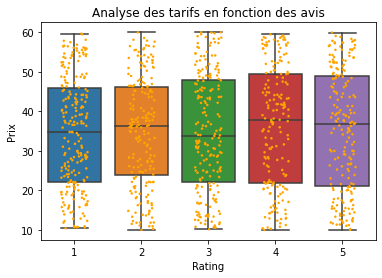

In [7]:
# Création du diagramme
ax = sns.boxplot(x='Rating', y='Prix', data=df)
ax = sns.stripplot(x='Rating', y='Prix', data=df, color="orange", jitter=0.2, size=2.5)

# Attribution d'un titre
plt.title("Analyse des tarifs en fonction des avis", loc="center")

# Affichage du diagramme
plt.show()

<i>Analyse visuelle du tarif en fonction de la note.</i>

Il n'en ressort absolument rien d'exploitable. Ce à quoi on s'attendait en sachant que les prix ont été défini de manière aléatoire.

In [ ]:
consumer_key= 'MB0lKh7JAAfEcis2jRJo5Nqgp'
consumer_secret= 'g5baBP1FqhSbvUDFJlDDAEjYK8juHUmeIqx95sFfSPTtoaA67f'
access_token= '1413036558794493956-8r6xQzgEUB33V9HtHFeJrS1neiqcnt'
access_token_secret= 'iJqm0vhgRcg2e3Af69ThedDHfCHGo5pUdjH0sNVbA1aqZ'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

<i>Authentification à l'API © Twitter grace à Tweepy.</i>

<i>Récupération des tweets grace à l'API © Twitter et Tweepy.</i>

<i>Nettoyage et normalisation des tweets.</i>

<i>Analyse visuel des avis des livres sur © Twitter.</i>

<h2>
    Références : 
</h2>

https://scrapy.org/

https://www.scrapingbee.com/blog/practical-xpath-for-web-scraping/

https://towardsdatascience.com/web-scraping-with-scrapy-practical-understanding-2fbdae337a3b

https://www.tweepy.org/